# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

 # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

      # Construct the API request URL for each city
    query_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Run an API request for each of the cities:
    try:

    # Send the API request
        
        response = requests.get(city_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
    
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Extract required data
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
    # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gargalianoi
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | sandnessjoen
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | shangri-la
Processing Record 8 of Set 1 | olinda
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | pathein
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | saudarkrokur
Processing Record 14 of Set 1 | tsiombe
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | durazno
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | ta`u
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | ilulissat
Pro

In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gargalianoi,37.0667,21.6333,284.46,79,16,4.53,GR,1710448670
1,longyearbyen,78.2186,15.6401,248.06,64,20,3.09,SJ,1710448829
2,sandnessjoen,66.0217,12.6316,278.38,93,75,9.77,NO,1710448694
3,port-aux-francais,-49.3500,70.2167,279.92,89,100,12.45,TF,1710448829
4,blackmans bay,-43.0167,147.3167,281.89,84,71,0.45,AU,1710448829


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gargalianoi,37.0667,21.6333,284.46,79,16,4.53,GR,1710448670
1,longyearbyen,78.2186,15.6401,248.06,64,20,3.09,SJ,1710448829
2,sandnessjoen,66.0217,12.6316,278.38,93,75,9.77,NO,1710448694
3,port-aux-francais,-49.3500,70.2167,279.92,89,100,12.45,TF,1710448829
4,blackmans bay,-43.0167,147.3167,281.89,84,71,0.45,AU,1710448829


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

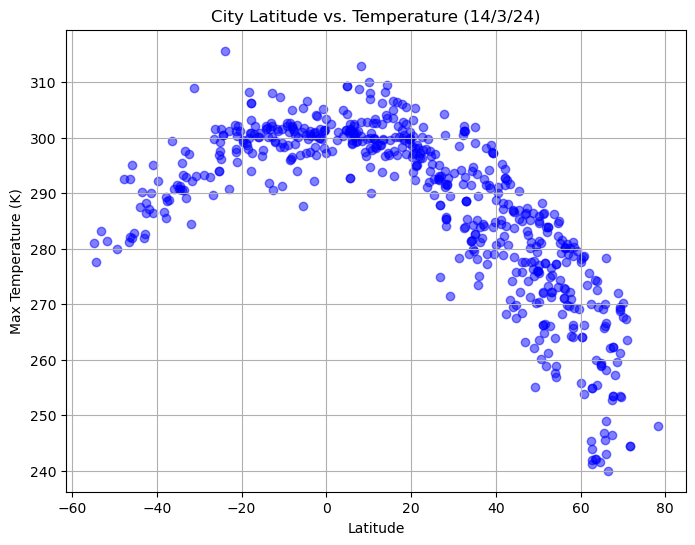

In [75]:
# Build scatter plot for latitude vs. temperature

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', alpha=0.5)

# Adding title and labels
plt.title("City Latitude vs. Temperature (14/3/24)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")

# Adding grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

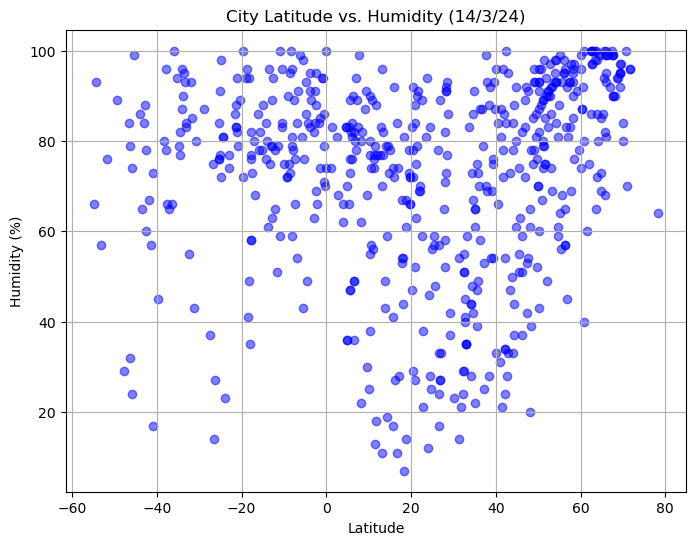

In [76]:
# Build the scatter plots for latitude vs. humidity

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='blue', alpha=0.5)

# Adding title and labels
plt.title("City Latitude vs. Humidity (14/3/24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Adding grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

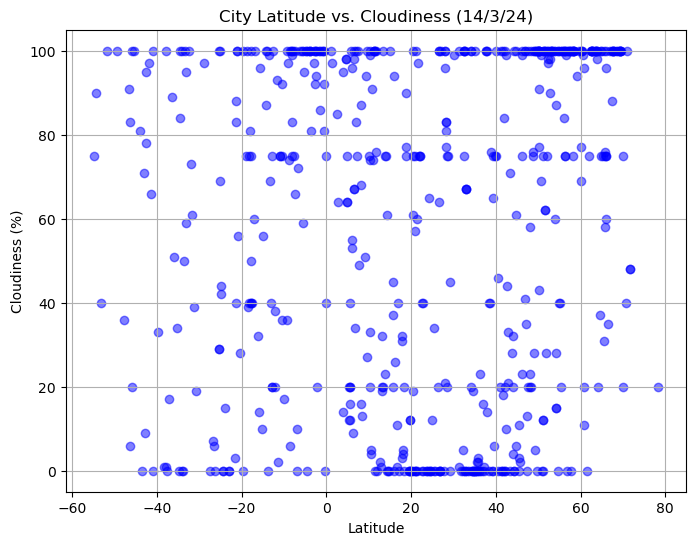

In [77]:
# Build the scatter plots for latitude vs. cloudiness

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='blue', alpha=0.5)

# Adding title and labels
plt.title("City Latitude vs. Cloudiness (14/3/24)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Adding grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

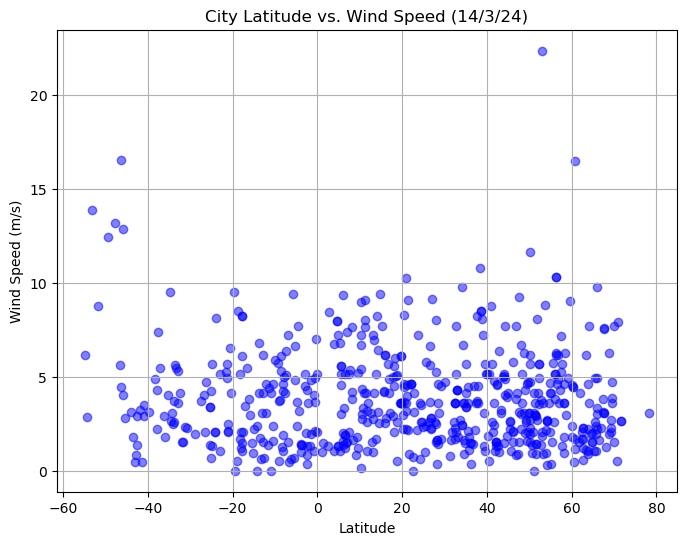

In [78]:
# Build the scatter plots for latitude vs. wind speed

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='blue', alpha=0.5)

# Adding title and labels
plt.title("City Latitude vs. Wind Speed (14/3/24)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Adding grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gargalianoi,37.0667,21.6333,284.46,79,16,4.53,GR,1710448670
1,longyearbyen,78.2186,15.6401,248.06,64,20,3.09,SJ,1710448829
2,sandnessjoen,66.0217,12.6316,278.38,93,75,9.77,NO,1710448694
5,tiksi,71.6872,128.8694,244.55,96,48,2.65,RU,1710448829
6,shangri-la,71.6872,128.8694,244.55,96,48,2.65,RU,1710448829


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,279.92,89,100,12.45,TF,1710448829
4,blackmans bay,-43.0167,147.3167,281.89,84,71,0.45,AU,1710448829
7,olinda,-8.0089,-34.8553,302.00,79,75,4.63,BR,1710448830
8,papatowai,-46.5619,169.4708,281.25,84,91,5.61,NZ,1710448830
10,edinburgh of the seven seas,-37.0676,-12.3116,288.69,65,17,5.49,SH,1710448831


###  Temperature vs. Latitude Linear Regression Plot

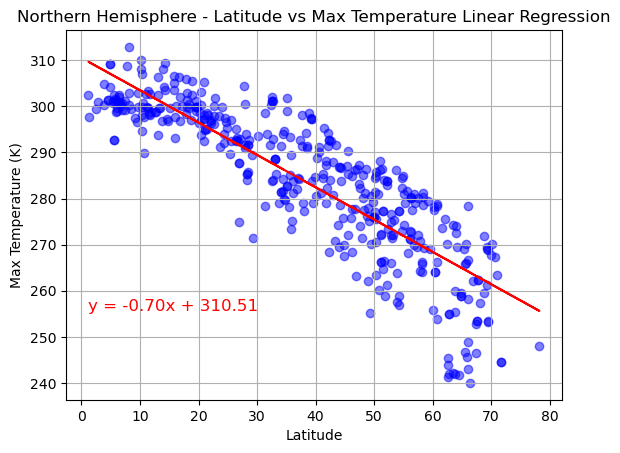

Correlation coefficient (r-value): -0.862621093669567


In [82]:
# Linear regression on Northern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Create scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='blue', alpha=0.5)

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Add text annotation for the equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (northern_hemi_df['Lat'].min(), regress_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('Northern Hemisphere - Latitude vs Max Temperature Linear Regression')

# Show plot
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r-value): {r_value}")

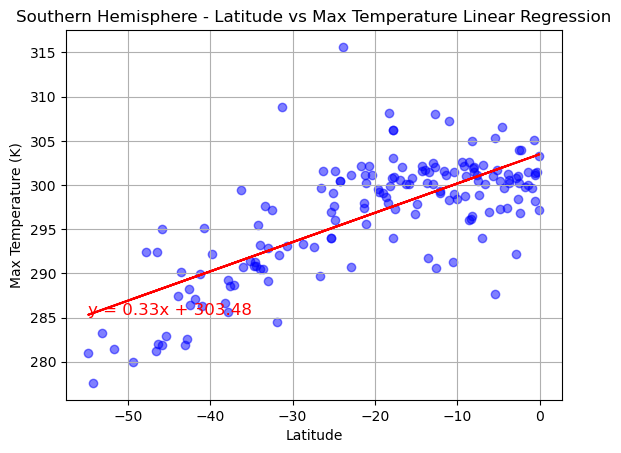

Correlation coefficient (r-value): 0.7240581992984261


In [83]:
# Linear regression on Southern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Calculate the regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept

# Create scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='blue', alpha=0.5)

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Add text annotation for the equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (southern_hemi_df['Lat'].min(), regress_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('Southern Hemisphere - Latitude vs Max Temperature Linear Regression')

# Show plot
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r-value): {r_value}")

**Discussion about the linear relationship:

For the Northern Hemisphere, the relationship shows a strong negative correlation i.e. the higher the latitude, the lower the temperature.

For the Southern Hemisphere, the relationship shows a postive correlation i.e. the higher the latitude, the higher the temperature.

Whilst this seems to show contradictory relationships, they are in fact the same - the latitude for the equator is 0, but for the North Pole it is +90, for the South Pole it is -90.  Both graphs show that the further away you go from the equator - so for the Northern Hemisphere the more positive the Latitude value and for the Southern Hemisphere the more negative the Latitude value, both graphs show that the colder it becomes.

The correlation co - efficient is stronger in the Northern Hemisphere as it is closer to 1 whereas for the Southern Hemisphere it is relatively further away from -1.

### Humidity vs. Latitude Linear Regression Plot

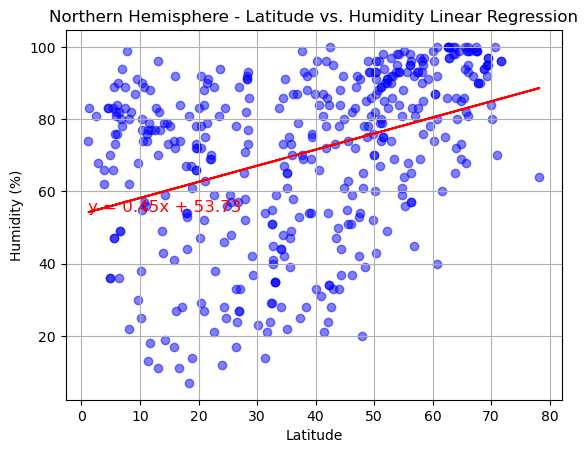

Correlation coefficient (r-value): 0.37520455526800606


In [84]:
# Linear regression on Northern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Create scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='blue', alpha=0.5)

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Add text annotation for the equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (northern_hemi_df['Lat'].min(), regress_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Latitude vs. Humidity Linear Regression')

# Show plot
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r-value): {r_value}")

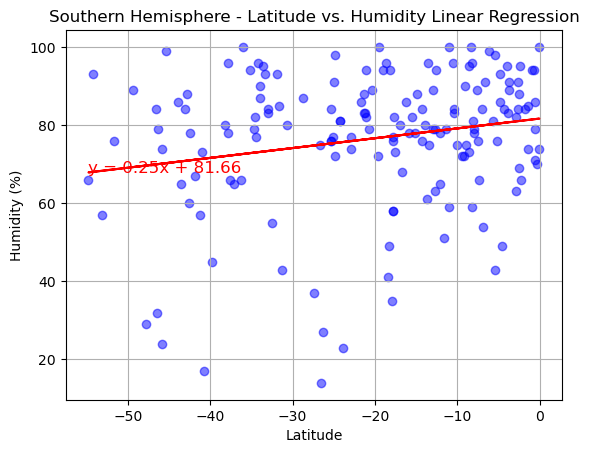

Correlation coefficient (r-value): 0.20709611835597097


In [85]:
# Linear regression on Southern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Calculate the regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept

# Create scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='blue', alpha=0.5)

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Add text annotation for the equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (southern_hemi_df['Lat'].min(), regress_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Latitude vs. Humidity Linear Regression')

# Show plot
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r-value): {r_value}")

**Discussion about the linear relationship:

For both hemispheres, there seems to be a positive correlation between humidity and latitude i.e. the further North you go , the more humid it is.  The correlation co - efficient is stronger in the Northern Hemisphere, suggesting that whilst the relationship is relatively weak i.e. not close to being perfect, it is stronger in the Northern Hemisphere. 

Whilst this may appear a bit strange, there could be other factors at play - for example it has been suggested that Human activity affects humidity and seeing as the more population density rich countries tend to be in the Northern Hemisphere, this could explain why this (albeit weak) relationship is observed.

### Cloudiness vs. Latitude Linear Regression Plot

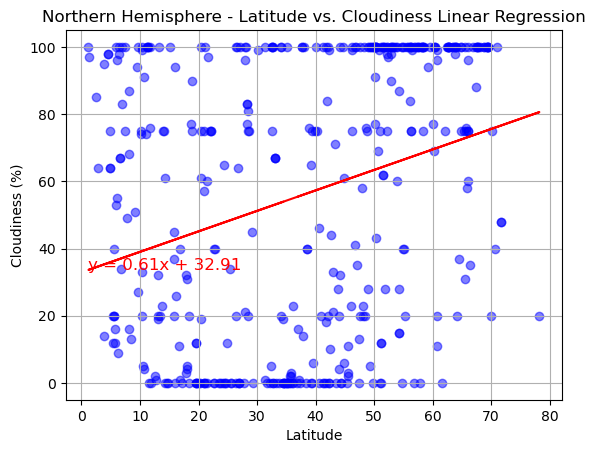

Correlation coefficient (r-value): 0.29136524089931964


In [86]:
# Northern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Create scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='blue', alpha=0.5)

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Add text annotation for the equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (northern_hemi_df['Lat'].min(), regress_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness Linear Regression')

# Show plot
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r-value): {r_value}")

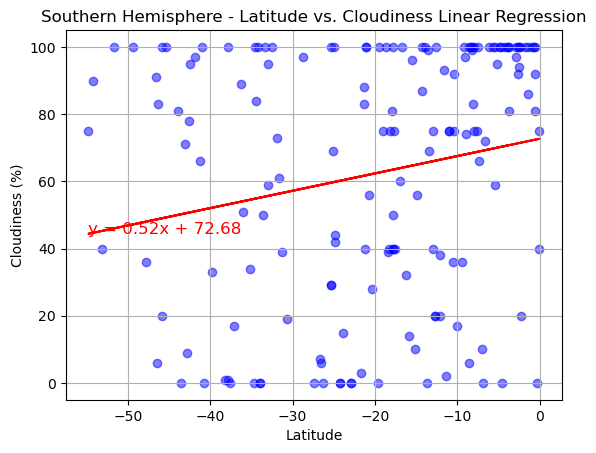

Correlation coefficient (r-value): 0.20184977832319767


In [87]:
# Southern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Calculate the regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept

# Create scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='blue', alpha=0.5)

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Add text annotation for the equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (southern_hemi_df['Lat'].min(), regress_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness Linear Regression')

# Show plot
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r-value): {r_value}")

**Discussion about the linear relationship:

For both hemispheres, there seems to be a weak positive correlation between cloudiness and latitude i.e. the further North you go , the more cloudy it is.  The correlation co - efficient is actually relatively close between both hemispheres - both can be truncated to 0.2.

However, looking at the graphs - and considering the correlation coefficient - with a high percentage of locations either have very high cloudiness or very low cloudiness across a range of latitudes - shown by what can be seen as two horizontal lines at the top and bottom of each graph,  I think that it is a struggle to draw any tangible conclusions - and meaningful inferences - on the relationship between the two variables. 

### Wind Speed vs. Latitude Linear Regression Plot

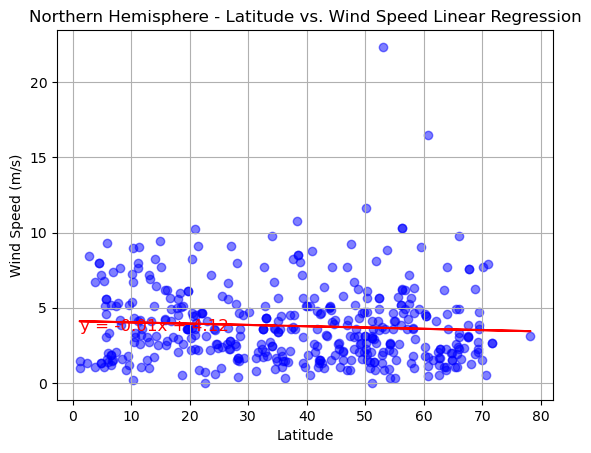

Correlation coefficient (r-value): -0.06595938762587703


In [88]:
# Northern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate the regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept

# Create scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='blue', alpha=0.5)

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Add text annotation for the equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (northern_hemi_df['Lat'].min(), regress_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed Linear Regression')

# Show plot
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r-value): {r_value}")

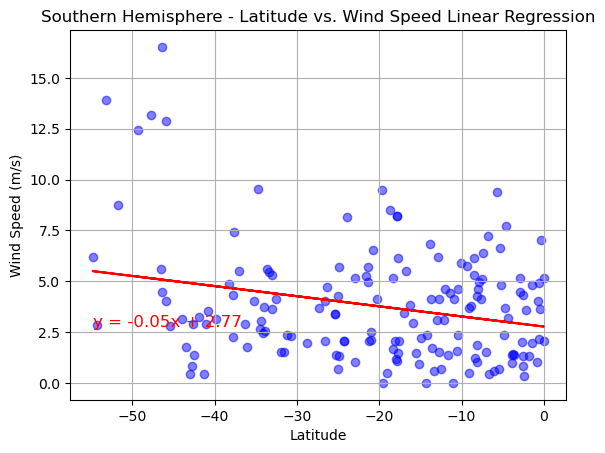

Correlation coefficient (r-value): -0.2580441365697926


In [89]:
# Southern Hemisphere

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Calculate the regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept

# Create scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='blue', alpha=0.5)

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Add text annotation for the equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (southern_hemi_df['Lat'].min(), regress_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere - Latitude vs. Wind Speed Linear Regression')

# Show plot
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f"Correlation coefficient (r-value): {r_value}")

**Discussion about the linear relationship:

For both hemispheres, there seems to be a weak negative correlation between speed and latitude i.e. the further North you go , the less the wind speed is.  The correlation co - efficient is stronger in the Southern Hemisphere, suggesting that whilst the relationship is relatively weak, it is stronger in the Southern Hemisphere.  Indeed, for the Northern Hemisphere the correlation is -0.07 (2DP) which as it is so close to zero suggests that we could argue that there is no correlation between the two for this hemisphere.